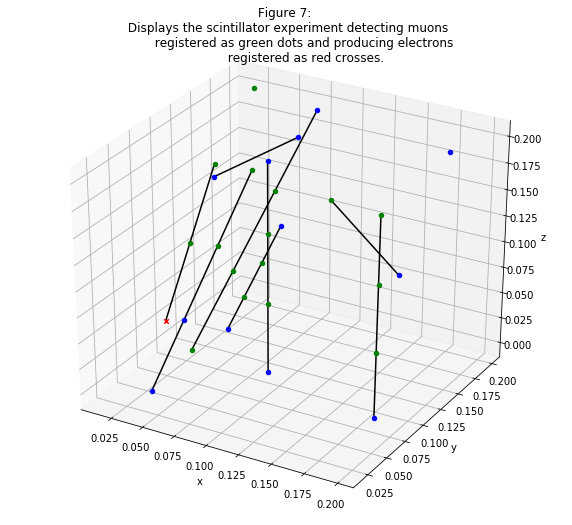

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def x(n):
    """Produces an even distribution of random numbers between zero and 2e-2.
    Inputs: The number of random numbers you wish to generate.
    Returns: The list of random numbers."""
    s = 20e-2
    return s*np.random.random(n)

def y(n):
    """Produces an even distribution of random numbers between zero and 2e-2.
    Inputs: The number of random numbers you wish to generate.
    Returns: The list of random numbers."""
    s = 20e-2
    return s*np.random.random(n)

def phi(n):
    """Produces an even distribution of random numbers between zero & two pi.
    Inputs: The number of random numbers you wish to generate.
    Returns: The list of random numbers."""

    return 2*np.pi*np.random.random(n)

def theta(n):
    """Produces a single random number between zero and pi/2, with a cos^2 distribution.
    Inputs: The number one.
    Returns: The value of a single random number."""
    d = 2/np.pi
    b = 1/np.pi
    m = d/b
    theta_ = []
    def p(x):
        return d*(np.cos(x))**2
    while len(theta_)<n:    
        z = np.random.uniform(0, np.pi/2)
        u = np.random.uniform(0, 1)
        if u <= (p(z))/(m*b):
            theta_.append(z)
    return theta_

def muon(n):
    """ Generates a muon
    Inputs: The number of muons you wish to create
    Returns: A dictionary containing the initial position and trajectory of the muon
    """
    x_0 = x(n)
    y_0 = y(n)
    thetalist = theta(n)    
    philist = phi(n)
    muon = { 'x': x_0, 'y': y_0, 'theta': thetalist, 'phi': philist}
    return muon

def mu_loc(x_0,y_0,thetalist,philist):
    """Determines the position of the muon on the detector plate
    Inputs: x_0,y_0; the x,y position of the muon on the detector above,
    thetalist,philist; the trajectory of the muon.
    Returns: A dictionary containing the x,y position of the muon on the detector 
    below."""
    l = 20e-2
    h = l/3
    x = x_0 + h*np.tan(thetalist)*np.cos(philist)
    y = y_0 + h*np.tan(thetalist)*np.sin(philist)
    loc_ = {'x': x, 'y': y}
    return loc_

def Electron(n):
    """Determines the direction vector of the electron with path length 1.8cm
    Inputs: The number of electrons you wish to produce
    Returns: A dictionary containing the x,y,z co-ordinates"""
    l = 1.8e-2
    vec = np.random.randn(3,n)
    vec /= np.linalg.norm(vec, axis=0)
    electron_ = [l*vec]
    direction_vec = {'x': electron_[0][0], 'y': electron_[0][1], 'z': electron_[0][2]}
    return direction_vec

def Electron_sim(n):
    """A version of the function Electron(n) designed to give a graphical plot.
    Inputs: The number of electrons you wish to produce
    Returns: The x,y,z co-ordinates of the electron"""

    l = 2
    vec = np.random.randn(3,n)
    vec /= np.linalg.norm(vec, axis=0)
    electron_ = [l*vec]
    x = electron_[0][0]
    y = electron_[0][1]
    z = electron_[0][2]
    return x,y,z  

def Electron_origin(x_0,y_0,thetalist,philist):
    """Determines the initial position of the electron.
    Inputs: The x,y position of the muon on the detector above the Cu layer
     and theta & phi (the trajectory of the muon).
    Returns: A dictionary containing the x,y location of the electron in the 
    z-axis centre of the Cu layer.
    """
    d = 0.5e-2
    x = x_0 + d*np.tan(thetalist)*np.cos(philist)
    y = y_0 + d*np.tan(thetalist)*np.sin(philist)
    origin_ = {'x': x, 'y': y}
    return origin_

def Electron_position(x_0,x_1,y_0,y_1,z_1):
    """Determines the position of the electron after it has travelled the maximum
    distance is can before it gets trapped.
    Inputs: The initial position and direction vector with path length 1.8cm
    Returns: A dictionary containing the x,y,z co-odinates of the electron"""
    x = x_0 + x_1
    y = y_0 + y_1
    z = z_1
    position_ = {'x': x, 'y': y, 'z': z}
    return position_

def Electron_final(d,x,y,z):
    """Determines the final position of an electron which has escaped the Cu layer.
    Inputs: d; the z-distance to the detector plate. x,y ; the x,y co-ordinates
    of the electron position. z; the z co-ordinate of the initial electron vector
    Returns: A dictionary containing the x,y location of the escaped electron on the 
    adjacent detector plate"""
    p = d/z
    final_ = {'x': p*x, 'y': p*y}
    return final_     


def Plotter(p,x,y,z):
    """Plots the locations of the muons as they either pass through or are 
    detected by a detector.
    Inputs: p; the probability of detection at a given detector, x,y,z; the
    location of the muon within the scintilator
    Returns: scatter plots of the muon locations and colours indicating whether
    they have been detected or not."""
    if np.random.uniform(0, 1) < p :
        ax.scatter(x ,y ,z, c = 'G', marker='o')
    else:
        ax.scatter(x ,y ,z, c = 'B', marker='o')
    return  


def Sim_plot(n):
    """Generates a 3-D visual simulation of the scintilator experiment
    Inputs: The number of muons you wish to create
    Returns: A 3-D model of the experiment"""
    l = 20e-2
    h = l/3
    p_s = 1e-1
    p_d_ = { 'P_0': 0.55, 'P_1': 0.6, 'P_2': 0.85, 'P_3': 0.5} 
    for _ in range(n):
        x_,y_,z_ = [],[],[]
        muon_ = muon(1)
        if np.random.uniform(0, 1) > p_s :
            Plotter(p_d_['P_0'],muon_['x'], muon_['y'],l)
            x_.append(muon_['x'])
            y_.append(muon_['y']) 
            z_.append(l)
            mu_loc_1_ = mu_loc(muon_['x'], muon_['y'],muon_['theta'], muon_['phi'])
            if 0  <= mu_loc_1_['x'] < l and 0  <= mu_loc_1_['y'] < l :
                if np.random.uniform(0, 1) > p_s :
                    Plotter(p_d_['P_1'],mu_loc_1_['x'], mu_loc_1_['y'],2*h)
                    x_.append(mu_loc_1_['x'])
                    y_.append(mu_loc_1_['y']) 
                    z_.append(2*h)                        
                    mu_loc_2_ = mu_loc(mu_loc_1_['x'],mu_loc_1_['y'],muon_['theta'], muon_['phi'])
                    if 0  <=mu_loc_2_['x'] < l and 0  <= mu_loc_2_['y'] < l :
                        if np.random.uniform(0, 1) > p_s :
                            Plotter(p_d_['P_2'],mu_loc_2_['x'], mu_loc_2_['y'],h)
                            x_.append(mu_loc_2_['x'])
                            y_.append(mu_loc_2_['y']) 
                            z_.append(h)                        
                            mu_loc_3_ = mu_loc(mu_loc_2_['x'],mu_loc_2_['y'],muon_['theta'], muon_['phi'])
                            if 0  <= mu_loc_3_['x'] < l and 0  <= mu_loc_3_['y'] < l :
                                Plotter(p_d_['P_3'],mu_loc_3_['x'], mu_loc_3_['y'],0) 
                                x_.append(mu_loc_3_['x'])
                                y_.append(mu_loc_3_['y']) 
                                z_.append(0)                                                        
                        else:
                            ax.scatter(mu_loc_2_['x'],mu_loc_2_['y'] ,h, c = 'R', marker='x')
                            x_.append(mu_loc_2_['x'])
                            y_.append(mu_loc_2_['y']) 
                            z_.append(h)                                                                       
                else:
                    ax.scatter(mu_loc_1_['x'],mu_loc_1_['y'] ,2*h, c = 'R', marker='x')
                    x_.append(mu_loc_1_['x'])
                    y_.append(mu_loc_1_['y']) 
                    z_.append(2*h)                                            
        else:
            ax.scatter(muon_['x'] ,muon_['y'] ,l, c = 'R', marker='x')
            x_.append(muon_['x'])
            y_.append(muon_['y']) 
            z_.append(l)
        ax.plot(x_,y_,z_, color='k')        
    return 

fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111, projection='3d')
sim_ = Sim_plot(int(10))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Figure 7: \n Displays the scintillator experiment detecting muons\n\
          registered as green dots and producing electrons \n\
          registered as red crosses.' )
plt.show();



